In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import *
from copy import deepcopy

In [24]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [25]:
from estimation import *

In [26]:
est_par = ['gamma', 'sigma', 'cost1', 'cost2', 'N', 'type_shares1'] # Parameters to estimate
theta0 = [0.9, 0.1, 100.0, 100.0, 15, 0.1] # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0.0,500.0), (0.0,500.0), (0, 45), (0.0, 1.0)] # Bounds for the parameters

est = method_simulated_moments(model, est_par,theta0,bounds)


c:\Users\rasmu\OneDrive\KU - Økonomi\Dynamic Programming\Term_Paper\Dynamic-programming-project\Model.py:119: RuntimeWarning: Mean of empty slice.
  par.r_u[t] = par.ref_income_u[t:t+int(par.N)].mean()		# Calculates the reference point for unemployed individuals by taking the mean of the income over the last N periods.
c:\Users\rasmu\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\rasmu\OneDrive\KU - Økonomi\Dynamic Programming\Term_Paper\Dynamic-programming-project\Model.py:130: RuntimeWarning: Mean of empty slice.
  par.r_e[t, s] = par.ref_income_e[t, s:s+int(par.N)].mean()


In [27]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.0000
Parameters:              0.033, 0.951, 174.733, 324.034, 1.100, 0.340
Number of iterations:    753


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


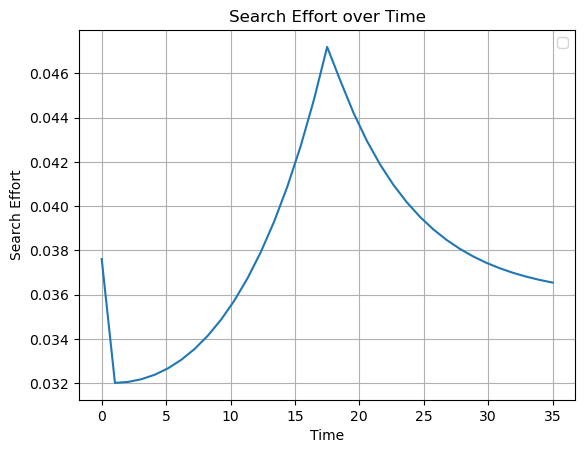

In [28]:
sim = sim_search_effort(model.par)
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, sim, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


In [29]:
model.par.b1 = 342.0/675.0
model.par.b2 = 171.0/675.0

model.allocate()
s_forecast = model.solve()



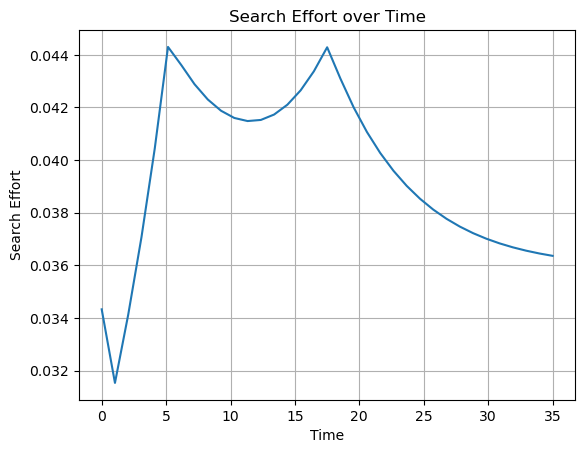

In [30]:
# Now plotting s_forecast
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, s_forecast, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [31]:
true_data = model.data.moments_after
print(np.shape(true_data))
print(np.shape(s_forecast))
# Get the mean square errors
mse = np.mean((true_data - s_forecast)**2)
print(mse)

(35, 1)
(35,)
7.764383709868383e-05


# No reference dependence

In [32]:
model_new = deepcopy(model)
model_new.par.eta = 0.0

est_par = ['gamma', 'sigma', 'cost1', 'cost2', 'N', 'type_shares1'] # Parameters to estimate
theta0 = [0.9, 0.1, 100.0, 100.0, 15, 0.1] # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0.0,500.0), (0.0,500.0), (0, 45), (0.0, 1.0)] # Bounds for the parameters

est = method_simulated_moments(model_new, est_par,theta0,bounds)

In [33]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.0000
Parameters:              0.033, 0.558, 241.054, 347.832, 17.677, 1.000
Number of iterations:    775


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


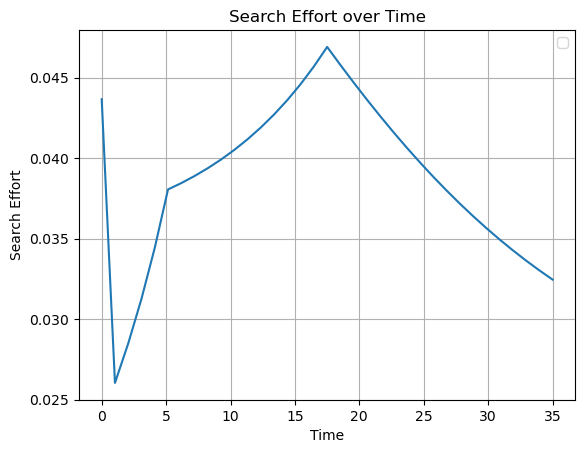

In [34]:
sim = sim_search_effort(model_new.par)
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, sim, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


In [35]:
model_new.par.b1 = 342.0/675.0
model_new.par.b2 = 171.0/675.0

model_new.allocate()
s_forecast = model_new.solve()



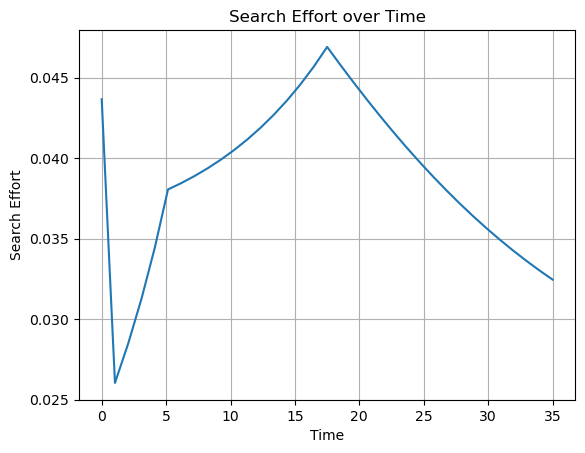

In [36]:
# Now plotting s_forecast
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, s_forecast, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [37]:
true_data = model_new.data.moments_after
print(np.shape(true_data))
print(np.shape(s_forecast))
# Get the mean square errors
mse = np.mean((true_data - s_forecast)**2)
print(mse)

(35, 1)
(35,)
9.023541329550529e-05
